In [1]:
import pandas as pd

In [2]:
# read the data
df = pd.read_json("../classwork/data/aliens-1.json")
df = pd.json_normalize(df["results"])
df.describe()
df.head()

,name,slimy,kill humans,catchphrase
0,stitch,1.0,2.0,ohana means family family means no one is left...
1,E.T.,2.0,1.0,E.T. phone home!
2,Harvester,9.0,10.0,I would like to conquer your planet
3,kang,10.0,8.0,Go ahead! Throw your vote away!
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!"


In [3]:
# extract the features we want to use! everything but catchphrase
df = df.drop("catchphrase", axis=1)

In [4]:
df.head()

,name,slimy,kill humans
0,stitch,1.0,2.0
1,E.T.,2.0,1.0
2,Harvester,9.0,10.0
3,kang,10.0,8.0
4,kodos,10.0,7.0


In [5]:
## Clustering begins now!
k = 2
# step one pick random points as centroids
centroids = df.sample(n=k)

In [6]:
centroids

,name,slimy,kill humans
10,"One-Eyed, One-Horned Flying Purple People Eater",4.0,10.0
36,Paul,2.0,1.5


In [7]:
import scipy.spatial.distance as ssd

# for each point in data, assign the point to its closest centroid
# we need a distance function
# lets use euclidean
# centroids can be 0 and 1 for k=2
centroid_assignments = []
for i in range(len(df)):
    current_point = df.iloc[i][["slimy", "kill humans"]]

    min_dist = float("inf")
    min_centroid = -1
    # COMPUTE DISTANCE TO EACH CENTROID
    for j in range(len(centroids)):
        current_centroid = centroids.iloc[j][["slimy", "kill humans"]]
        distance = ssd.euclidean(current_centroid, current_point)

        # if distance was min, assign min distance and min centroid
        if distance < min_dist:
            min_dist = distance
            min_centroid = j
    centroid_assignments.append(min_centroid)

centroid_assignments



[1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0]

<Axes: xlabel='slimy', ylabel='kill humans'>

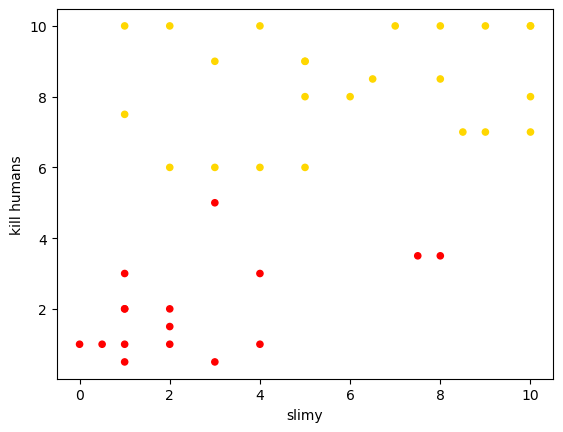

In [8]:
# add this cluster to our dataframe for viz
df["cluster"] = centroid_assignments
# add color to our df
import numpy as np
df["color"] = np.where(df["cluster"]==1, "red", "gold")
df.plot.scatter(x="slimy", y="kill humans", c="color")

In [10]:
# move your centroids based on the newly clustered data
df.head()
# new centroid for 0 would be slimy=1.5 and kill humans = 1.5
# new centroid for 1 would be slimy = mean(9, 10, 10) and kill humans = 
# mean(10, 8, 7)

# PPP 5!!!


,name,slimy,kill humans,cluster,color
0,stitch,1.0,2.0,1,red
1,E.T.,2.0,1.0,1,red
2,Harvester,9.0,10.0,0,gold
3,kang,10.0,8.0,0,gold
4,kodos,10.0,7.0,0,gold
